## Name: Daniel Kojo Afealete Fiadjoe
## Student ID: 202291439
## Course: DSCI-6601-001 (Pract Machine Learning 77223)
## Assignment 2

### Question 1

#### Import Libraries

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 

# Libraries to split data, create simple linaer regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

Load the given EPA fuel economy data set into a pandas dataframe. Write code which removes the non-numeric columns from the data frame. Create a new column named “CityHighwayDiff” which is calculated by taking the difference of the “city08” column and “highway08” column. Plot a histogram of this column.

In [2]:
# Code to load in the  EPA fuel economy data set and show the rows and columns
df = pd.read_csv('EPA fuel economy dataset.csv')
data = df                                        # duplicate dataframe

In [3]:
data.head()

,city08,cityA08,cylinders,fuelType,fuelType1,highway08,highwayA08,id,make,model,mpgData,trany,year,fuelType2
0,19,0,4,Regular,Regular Gasoline,25,0,1,Alfa Romeo,Spider Veloce 2000,Y,Manual 5-spd,1985,NaN
1,9,0,12,Regular,Regular Gasoline,14,0,10,Ferrari,Testarossa,N,Manual 5-spd,1985,NaN
2,23,0,4,Regular,Regular Gasoline,33,0,100,Dodge,Charger,Y,Manual 5-spd,1985,NaN
3,10,0,8,Regular,Regular Gasoline,12,0,1000,Dodge,B150/B250 Wagon 2WD,N,Automatic 3-spd,1985,NaN
4,17,0,4,Premium,Premium Gasoline,23,0,10000,Subaru,Legacy AWD Turbo,N,Manual 5-spd,1993,NaN


In [4]:
# Code to display the number of rows and columns
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 6000 rows and 14 columns.


In [5]:
# Display columns data type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city08      6000 non-null   int64  
 1   cityA08     6000 non-null   int64  
 2   cylinders   6000 non-null   int64  
 3   fuelType    6000 non-null   object 
 4   fuelType1   6000 non-null   object 
 5   highway08   6000 non-null   int64  
 6   highwayA08  6000 non-null   int64  
 7   id          6000 non-null   int64  
 8   make        6000 non-null   object 
 9   model       6000 non-null   object 
 10  mpgData     6000 non-null   object 
 11  trany       6000 non-null   object 
 12  year        6000 non-null   int64  
 13  fuelType2   0 non-null      float64
dtypes: float64(1), int64(7), object(6)
memory usage: 656.4+ KB


In [6]:
# Dropping the non-numeric columns.
data = data.drop(['fuelType', 'fuelType1', 'make', 'model', 'mpgData', 'trany'], axis = 1)

In [7]:
data.info()
print()
print('Confirmation that the non-numeric columns has been removed')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city08      6000 non-null   int64  
 1   cityA08     6000 non-null   int64  
 2   cylinders   6000 non-null   int64  
 3   highway08   6000 non-null   int64  
 4   highwayA08  6000 non-null   int64  
 5   id          6000 non-null   int64  
 6   year        6000 non-null   int64  
 7   fuelType2   0 non-null      float64
dtypes: float64(1), int64(7)
memory usage: 375.1 KB

Confirmation that the non-numeric columns has been removed


In [8]:
data.head()

,city08,cityA08,cylinders,highway08,highwayA08,id,year,fuelType2
0,19,0,4,25,0,1,1985,NaN
1,9,0,12,14,0,10,1985,NaN
2,23,0,4,33,0,100,1985,NaN
3,10,0,8,12,0,1000,1985,NaN
4,17,0,4,23,0,10000,1993,NaN


In [9]:
# Creaing the new column CityHighwayDiff.
data['CityHighwayDiff'] = data['highway08'] - data['city08']

In [10]:
data.head()

,city08,cityA08,cylinders,highway08,highwayA08,id,year,fuelType2,CityHighwayDiff
0,19,0,4,25,0,1,1985,NaN,6
1,9,0,12,14,0,10,1985,NaN,5
2,23,0,4,33,0,100,1985,NaN,10
3,10,0,8,12,0,1000,1985,NaN,2
4,17,0,4,23,0,10000,1993,NaN,6


New column created as shown in the above table

Text(0.5, 0, 'City Highway Diff.')

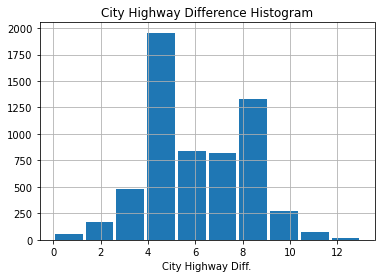

In [11]:
# Plot a histogram of this column "CityHighwayDiff".
data.hist('CityHighwayDiff',bins= 10, rwidth=0.9)
plt.title('City Highway Difference Histogram')
plt.xlabel('City Highway Diff.')

In [12]:
data.isna().sum() 

city08                0
cityA08               0
cylinders             0
highway08             0
highwayA08            0
id                    0
year                  0
fuelType2          6000
CityHighwayDiff       0
dtype: int64

The column labelled "fuelType2" has missing values (6000) in all the rows in the dataframe so it will be dropped.

In [13]:
# Dropping the column labelled "fuelType2".
data = data.drop(['fuelType2'], axis=1)

In [14]:
data.head()

,city08,cityA08,cylinders,highway08,highwayA08,id,year,CityHighwayDiff
0,19,0,4,25,0,1,1985,6
1,9,0,12,14,0,10,1985,5
2,23,0,4,33,0,100,1985,10
3,10,0,8,12,0,1000,1985,2
4,17,0,4,23,0,10000,1993,6


### Question 2

Using the EPA fuel economy data set. Consider the “year” column. Create a new column “Decade” from the year column which maps each year into a class based on its decade. Plot a histogram of the Decade column to visualize the occurrences in each of the decades. Remove any other non-numeric columns from the dataframe. With the columns remaining, create a linear classifier that predicts the decade of a particular car based on the rest of the columns. Train the classifier using the entire dataset. Calculate and print the training error of the resulting classifier.

In [15]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

# Libraries to split data, create simple linaer regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [16]:
# Code to load in the  EPA fuel economy data set and show the rows and columns
df1 = pd.read_csv('EPA fuel economy dataset.csv')
data2 = df1

In [17]:
data2.head()

,city08,cityA08,cylinders,fuelType,fuelType1,highway08,highwayA08,id,make,model,mpgData,trany,year,fuelType2
0,19,0,4,Regular,Regular Gasoline,25,0,1,Alfa Romeo,Spider Veloce 2000,Y,Manual 5-spd,1985,NaN
1,9,0,12,Regular,Regular Gasoline,14,0,10,Ferrari,Testarossa,N,Manual 5-spd,1985,NaN
2,23,0,4,Regular,Regular Gasoline,33,0,100,Dodge,Charger,Y,Manual 5-spd,1985,NaN
3,10,0,8,Regular,Regular Gasoline,12,0,1000,Dodge,B150/B250 Wagon 2WD,N,Automatic 3-spd,1985,NaN
4,17,0,4,Premium,Premium Gasoline,23,0,10000,Subaru,Legacy AWD Turbo,N,Manual 5-spd,1993,NaN


In [18]:
#Creating a new column called "Decade".

data2["decade"]= [ int(np.floor(year/10) * 10) for year in data2["year"]]

In [19]:
data2.head()

,city08,cityA08,cylinders,fuelType,fuelType1,highway08,highwayA08,id,make,model,mpgData,trany,year,fuelType2,decade
0,19,0,4,Regular,Regular Gasoline,25,0,1,Alfa Romeo,Spider Veloce 2000,Y,Manual 5-spd,1985,NaN,1980
1,9,0,12,Regular,Regular Gasoline,14,0,10,Ferrari,Testarossa,N,Manual 5-spd,1985,NaN,1980
2,23,0,4,Regular,Regular Gasoline,33,0,100,Dodge,Charger,Y,Manual 5-spd,1985,NaN,1980
3,10,0,8,Regular,Regular Gasoline,12,0,1000,Dodge,B150/B250 Wagon 2WD,N,Automatic 3-spd,1985,NaN,1980
4,17,0,4,Premium,Premium Gasoline,23,0,10000,Subaru,Legacy AWD Turbo,N,Manual 5-spd,1993,NaN,1990


Text(0.5, 0, 'Decades')

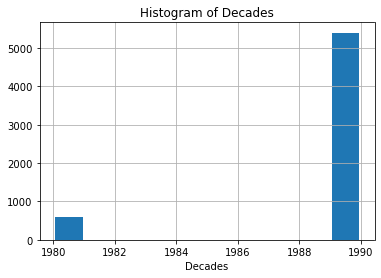

In [20]:
# Plot a histogram of the Decade column to visualize the occurrences in each of the decades.
data2.hist('decade',bins= 10, rwidth=0.9)
plt.title('Histogram of Decades')
plt.xlabel('Decades')

In [21]:
# Dropping the non-numeric columns.
data2 = data2.drop(['fuelType', 'fuelType1', 'make', 'model', 'mpgData', 'trany'], axis = 1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city08      6000 non-null   int64  
 1   cityA08     6000 non-null   int64  
 2   cylinders   6000 non-null   int64  
 3   highway08   6000 non-null   int64  
 4   highwayA08  6000 non-null   int64  
 5   id          6000 non-null   int64  
 6   year        6000 non-null   int64  
 7   fuelType2   0 non-null      float64
 8   decade      6000 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 422.0 KB


Confirmation that the non-numeric columns has been removed.

In [22]:
data2.head()

,city08,cityA08,cylinders,highway08,highwayA08,id,year,fuelType2,decade
0,19,0,4,25,0,1,1985,NaN,1980
1,9,0,12,14,0,10,1985,NaN,1980
2,23,0,4,33,0,100,1985,NaN,1980
3,10,0,8,12,0,1000,1985,NaN,1980
4,17,0,4,23,0,10000,1993,NaN,1990


In [23]:
data2.isna().sum() 

city08           0
cityA08          0
cylinders        0
highway08        0
highwayA08       0
id               0
year             0
fuelType2     6000
decade           0
dtype: int64

The column labelled "fuelType2" has missing values (6000) in all the rows in the dataframe so it will be dropped. 

In [24]:
# Dropping the column labelled "fuelType2".
data2 = data2.drop(['fuelType2'], axis=1)

In [25]:
data2.head()

,city08,cityA08,cylinders,highway08,highwayA08,id,year,decade
0,19,0,4,25,0,1,1985,1980
1,9,0,12,14,0,10,1985,1980
2,23,0,4,33,0,100,1985,1980
3,10,0,8,12,0,1000,1985,1980
4,17,0,4,23,0,10000,1993,1990


### Design of linear classifier that predict the decade of a particular car

In [26]:
# Divide the data into independent and dependent variables
X = data2.drop(["decade"], axis=1).values      # independent variables
Y = data2[["decade"]].values                   # dependent variables

In [27]:
# Print new data
print(X)
print(Y)

[[   19     0     4 ...     0     1  1985]
 [    9     0    12 ...     0    10  1985]
 [   23     0     4 ...     0   100  1985]
 ...
 [   12     0     8 ...     0 15397  1999]
 [   13     0     6 ...     0 15398  1999]
 [   12     0     8 ...     0 15399  1999]]
[[1980]
 [1980]
 [1980]
 ...
 [1990]
 [1990]
 [1990]]


In [28]:
# Linear regression to fit and predict. Using Logistic Regression to model
log_model = LogisticRegression(random_state=1)
clf = log_model.fit(X,Y)
clf.score(X,Y)

/Users/danielfiadjoe/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1.0

In [29]:
# Calculate the training error
y_predict = log_model.predict(X)

print("The predicted decade of cars are:")
print(y_predict)

The predicted decade of cars are:
[1980 1980 1980 ... 1990 1990 1990]


In [30]:
# Print errors
print(mean_squared_error(Y, y_predict))
print(np.mean(np.square(np.array(y_predict)-np.array(Y))))

0.0
18.02666111111111


## Question 3

Building on 2, split the training set used into a training and test set (split evenly 50:50). Re-fit the linear classifier developed above on the 50% training set and calculate and print the mean absolute error of the predictor using the 50% test set.

#### Split the data from question 2 into 50:50 and re-fit.

In [31]:
# Spliting data into training (50%) and test data (50%) sets.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

In [32]:
# Shape of the train and test sets
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])
print("Number of rows in train data =", y_train.shape[0])
print("Number of rows in test data =", y_test.shape[0])

Number of rows in train data = 3000
Number of rows in test data = 3000
Number of rows in train data = 3000
Number of rows in test data = 3000


In [33]:
# Fitting the linear regression model for the training (50%) and test data (50%) sets
log_model1 = LogisticRegression(random_state=1)
clf1 = log_model1.fit(x_train,y_train)
clf1.score(x_train,y_train)

/Users/danielfiadjoe/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1.0

In [34]:
y_predict2 = log_model1.predict(x_test)
print("List of predicted decades: ", y_predict2)
mean_ab_error = metrics.mean_absolute_error(y_test, y_predict2)
print()
print("The mean absolute error of the predictor using 50% of test set is: ", mean_ab_error)

List of predicted decades:  [1990 1990 1990 ... 1990 1990 1990]

The mean absolute error of the predictor using 50% of test set is:  0.0


## Question 4

Pick 2 of the numeric columns of the dataframe to eliminate from the table. Re-train the classifier using this new dataset. Compare the testing and training error using the 50/50 split of the missing columns classifier with that containing the full set of columns.

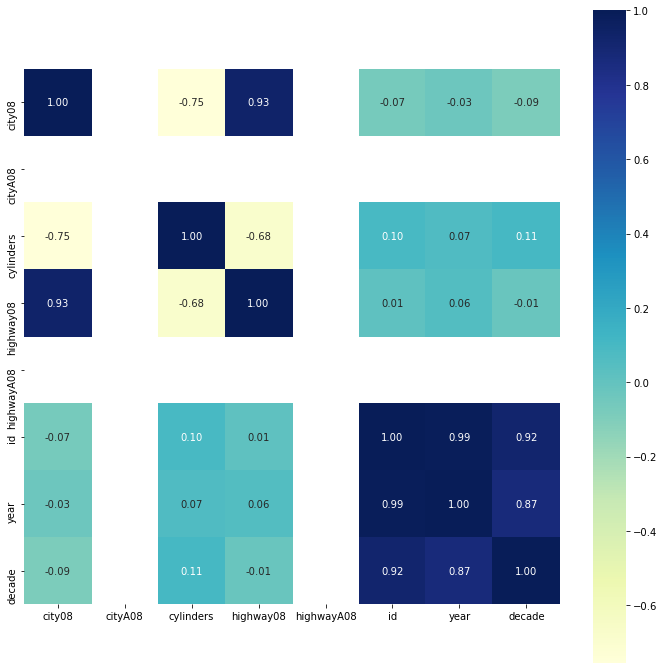

In [35]:
#Let's Look at correlation values
corr=data2.corr()
fig,ax=plt.subplots(figsize=(12,12))
ax=sns.heatmap(corr,annot=True,square=True,fmt=".2f",cmap="YlGnBu")

From the above diagram, the 2 variables with no correlation can be removed because they have not impart on the data. The variables are "city08" and "highwayA08".

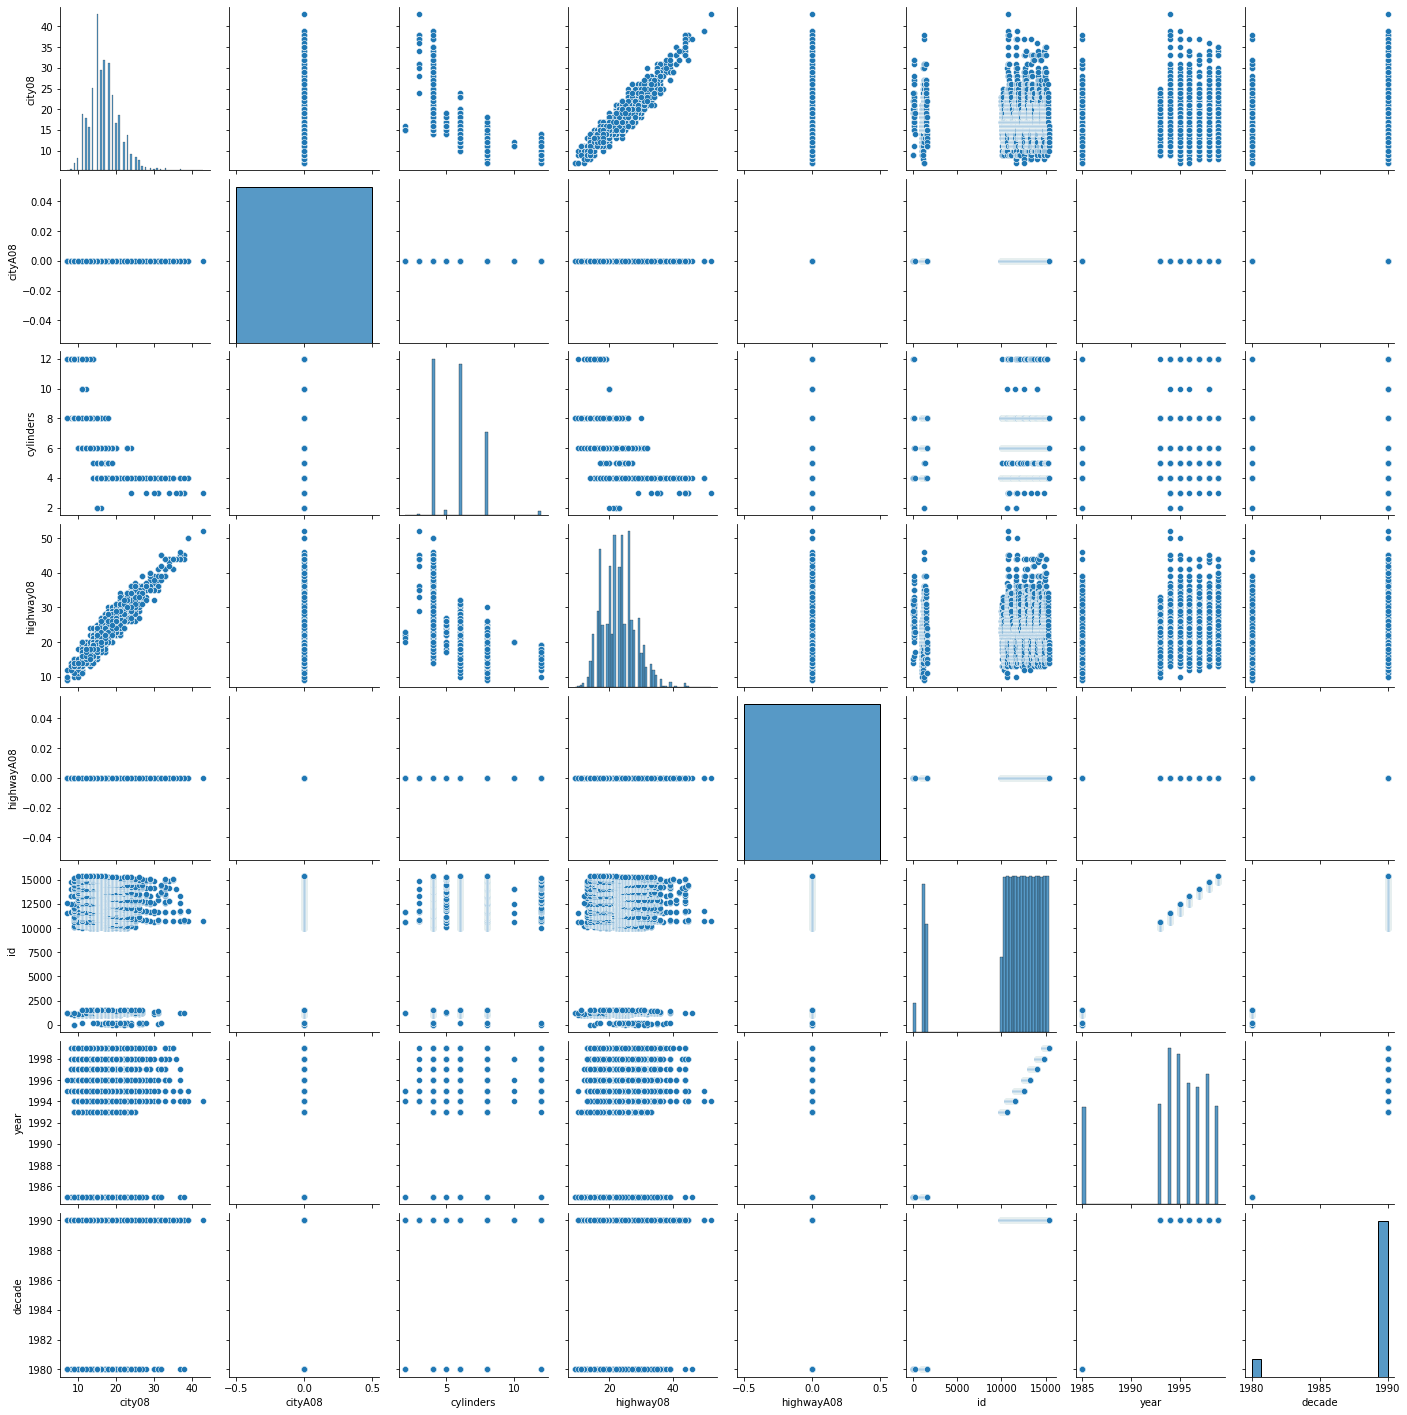

In [36]:
sns.pairplot(data2)

The pairplot above is also showing no reletionship between the 2 varibales which is shown as a single block in the diagram.

In [37]:
data2.nunique().sort_values(ascending=True)

cityA08          1
highwayA08       1
decade           2
cylinders        8
year             8
city08          34
highway08       40
id            6000
dtype: int64

Checking uniquiness of the variables also indicates that the 2 variables have value in them which is zero (0). Based on the 3 analyses above, the variables "city08" and "highwayA08" will be dropped as requested in the question.

In [38]:
# Duplicating data used in question 3.
data3 = data2

In [39]:
# Dropping the columns labelled "city08" and "highwayA08".
data3 = data3.drop(["cityA08", "highwayA08"], axis=1)

In [40]:
data3.head()

,city08,cylinders,highway08,id,year,decade
0,19,4,25,1,1985,1980
1,9,12,14,10,1985,1980
2,23,4,33,100,1985,1980
3,10,8,12,1000,1985,1980
4,17,4,23,10000,1993,1990


In [41]:
# Divide the data into independent and dependent variables
X2 = data3.drop(["decade"], axis=1)                         # independent variables
Y2 = data3["decade"]                                        # dependent variables

In [42]:
# Print new data
print(X2)
print(Y2)

      city08  cylinders  highway08     id  year
0         19          4         25      1  1985
1          9         12         14     10  1985
2         23          4         33    100  1985
3         10          8         12   1000  1985
4         17          4         23  10000  1993
...      ...        ...        ...    ...   ...
5995      13          6         18  15395  1999
5996      13          8         16  15396  1999
5997      12          8         17  15397  1999
5998      13          6         15  15398  1999
5999      12          8         18  15399  1999

[6000 rows x 5 columns]
0       1980
1       1980
2       1980
3       1980
4       1990
        ... 
5995    1990
5996    1990
5997    1990
5998    1990
5999    1990
Name: decade, Length: 6000, dtype: int64


In [43]:
# Spliting data into training (50%) and test data (50%) sets.
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.5, random_state=1)

In [44]:
# Shape of the train and test sets
print("Number of rows in train data =", x2_train.shape[0])
print("Number of rows in test data =", x2_test.shape[0])
print("Number of rows in train data =", y2_train.shape[0])
print("Number of rows in test data =", y2_test.shape[0])

Number of rows in train data = 3000
Number of rows in test data = 3000
Number of rows in train data = 3000
Number of rows in test data = 3000


In [45]:
# Fitting the linear regression model for the training (50%) and test data (50%) sets
log_model2 = LogisticRegression(random_state=1)
clf2 = log_model2.fit(x2_train,y2_train)
clf2.score(x2_train,y2_train)

1.0

In [46]:
y2_predict3 = log_model2.predict(x2_test)
print("List of predicted decades: ", y2_predict3)
mean_ab_error2 = metrics.mean_absolute_error(y2_test, y2_predict3)
print()
print("The mean absolute error of the predictor using 50% of test set is: ", mean_ab_error2)
training_error5 = np.mean(np.square(np.array(y2_predict3)-np.array(y2_train)))
print()
mse = mean_squared_error(y2_train, y2_predict3)
print("The mean squared error: ", mse)
print("The error:", training_error5)

List of predicted decades:  [1990 1990 1990 ... 1990 1990 1990]

The mean absolute error of the predictor using 50% of test set is:  0.0

The mean squared error:  18.233333333333334
The error: 18.233333333333334


The test error is 0.0 and the training error is 18.2.

From the results above, it confirms that the 2 variables ("city08" and "highwayA08") that were dropped from data did not affect the model. There was no negative impact or positive impact on the model.